In [1]:
#import dependencies
from sklearn.ensemble import RandomForestClassifier
import pandas as pd


In [2]:
#Read in data and display first 25 rows
features = pd.read_csv("./Cleaned.csv", usecols=['Ladder', 'GDP', 'Support', 'Health', 'Freedom', 'Generosity','Corruption'])
features.head(25)

,Ladder,GDP,Support,Health,Freedom,Generosity,Corruption
0,3.723590,7.144916,0.450662,50.799999,0.718114,0.178993,0.881686
1,4.401778,7.314788,0.552308,51.200001,0.678896,0.201228,0.850035
2,4.758381,7.421525,0.539075,51.599998,0.600127,0.131578,0.706766
3,3.831719,7.394349,0.521104,51.919998,0.495901,0.173452,0.731109
4,3.782938,7.480296,0.520637,52.240002,0.530935,0.246943,0.775620
5,3.572100,7.499845,0.483552,52.560001,0.577955,0.072033,0.823204
6,3.130896,7.493170,0.525568,52.880001,0.508514,0.114906,0.871242
7,3.982855,7.476808,0.528597,53.200001,0.388928,0.090780,0.880638
8,4.220169,7.471376,0.559072,53.000000,0.522566,0.053188,0.793246
9,2.661718,7.472197,0.490880,52.799999,0.427011,-0.110382,0.954393


In [3]:
#Number of rows and columns of dataset
print('The shape of our features is:', features.shape)

The shape of our features is: (1627, 7)


In [4]:
#Descriptive statistics for each column
features.describe()

,Ladder,GDP,Support,Health,Freedom,Generosity,Corruption
count,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000
mean,5.414615,9.184053,0.807677,62.985019,0.734386,-0.000092,0.753488
std,1.142164,1.167318,0.122483,7.712987,0.143952,0.162850,0.184103
min,2.375092,6.456574,0.290184,32.299999,0.257534,-0.331775,0.035198
25%,4.561009,8.231128,0.739736,57.599998,0.639934,-0.114054,0.699170
50%,5.312483,9.372202,0.832254,65.000000,0.751168,-0.023358,0.806226
75%,6.235699,10.132307,0.905363,68.410000,0.849376,0.090260,0.875121
max,7.970892,11.630937,0.987343,76.800003,0.985178,0.671231,0.983276


In [5]:
#Use numpy to convert to arrays
import numpy as np

In [6]:
#Labels are the values we want to predict
labels = np.array(features["Ladder"])
#Remove the label from the features
features = features.drop("Ladder", axis= 1)

#Saving feature names for later use
feature_list = list(features.columns)
#Convert to numpy array
features = np.array(features)

In [7]:
#Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

In [8]:
#Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [9]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (1220, 6)
Training Labels Shape: (1220,)
Testing Features Shape: (407, 6)
Testing Labels Shape: (407,)


In [10]:
#The baseline predictions are the historical averages
baseline_predictions = test_features[:, feature_list.index('GDP')]
#Baseline errors, and display average baseline error
baseline_errors = abs(baseline_predictions - test_labels)
print('Average baseline error:', round(np.mean(baseline_errors), 2))

Average baseline error: 3.7


In [11]:
#Import the Random Forest Model
from sklearn.ensemble import RandomForestRegressor

In [12]:
#Instantiate model with 1,000 decision trees
rf = RandomForestRegressor(n_estimators=1000, random_state = 42)
#Train the model on training data
rf.fit(train_features, train_labels);

In [13]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
#Calculate the absolute errors 
errors = abs(predictions - test_labels)
#Print out the mean absolute error(mae)
print ("Mean Absolute Error:", round(np.mean(errors), 2))

Mean Absolute Error: 0.32


In [14]:
#Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
#Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), "%")

Accuracy: 93.79 %


In [15]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

In [16]:
#Pull out one tree from the forest
tree = rf.estimators_[5]
#Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
#Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
#Write the graph to a png file
graph.write_png('tree.png')

In [17]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_features, train_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [18]:
#Extract the Small Tree
tree_small = rf_small.estimators_[5]

In [19]:
#Save the Small tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
#Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
#Write the graph to a png file
graph.write_png('small_tree.png')

In [20]:
#Get numerical features importances
importances = list(rf.feature_importances_)
#List of Tuples with vaiable and importances
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip (feature_list, importances)]
#Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
#Print out the feature and importances
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Health               Importance: 0.62
Variable: GDP                  Importance: 0.13
Variable: Support              Importance: 0.1
Variable: Generosity           Importance: 0.06
Variable: Freedom              Importance: 0.05
Variable: Corruption           Importance: 0.05


In [21]:
#New random forest with only the three most important variables
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)
#Extract the two most important features
important_indices = [feature_list.index('Health'), feature_list.index('GDP'), feature_list.index('Support')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]
#Train the Random Forest
rf_most_important.fit(train_important, train_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [22]:
#Make predictions and determine the error
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - test_labels)

In [23]:
#Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = np.mean(100* (errors/test_labels))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.36 degrees.
Accuracy: 93.11 %.


In [24]:
def rfr_model(train_features, train_labels):
    gsc = GridSearchCV(
    estimator=RandomForestRegressor(),
    param_grid={
        'max_depth':range(3,7),
        'n_estimators': (10, 50, 100, 1000),
    }, 
    cv=5, scoring='neg_mean_squared_error', verbose=0,n_jobs=-1)
    
    grid_result = gsc.fit(train_features, train_labels) 
    best_params = grid_result.best_params_
    
    rfr = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"], random_state=False, verbose=False)
    scores = cross_val_score(rfr, train_features, train_labels, cv=10, scoring='neg_mean_absolute_error')
    
    return scores
    return best_params
    return best_params_

In [25]:
best = {'bootstrap': True,
 'max_depth': 8,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 500}
regressor = RandomForestRegressor(**best, random_state=42)
regressor.fit(train_features, train_labels)
print("Train: ", regressor.score(train_features, train_labels))
print("Test: ", regressor.score(test_features, test_labels))
print("Feature Importance: ", regressor.feature_importances_)

Train:  0.9155197003412583
Test:  0.8494146042302461
Feature Importance:  [0.26934542 0.20853437 0.32952132 0.08659843 0.04160739 0.06439307]


In [26]:
#Import matplotlib for plotting and use magic command for Jupyter Notebook
import matplotlib.pyplot as plt
%matplotlib inline

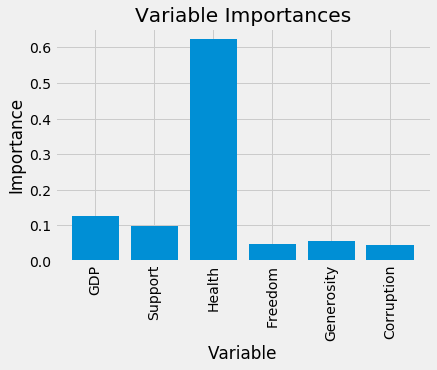

In [27]:
#Set the style
plt.style.use('fivethirtyeight')
#List of X locations for plotting
x_values= list(range(len(importances)))
#Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
#Tick labels for X axis
plt.xticks(x_values, feature_list, rotation = 'vertical')
#Axis labels and titles
plt.ylabel('Importance'); plt.xlabel('Variable');
plt.title('Variable Importances');

In [28]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

In [29]:
print ('The shape of our features is:', train_features.shape)

The shape of our features is: (1220, 6)


In [30]:
print ('The shape of our features is:', train_labels.shape)

The shape of our features is: (1220,)


In [31]:
print ('The shape of our features is:', test_features.shape)

The shape of our features is: (407, 6)


In [32]:
print ('The shape of our features is:', test_labels.shape)

The shape of our features is: (407,)


TypeError: set_xticklabels() missing 1 required positional argument: 'labels'

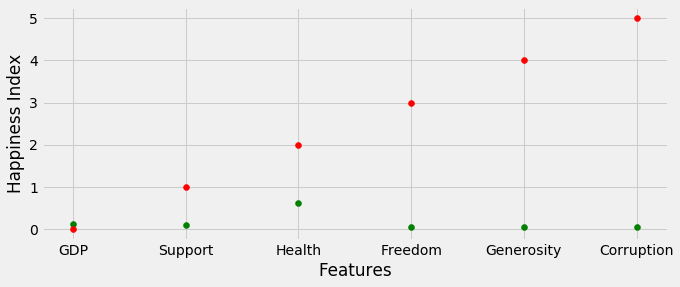

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
fig, ax = plt.subplots(figsize=(10, 4))

## Showcase the gdp index 
x_values = list(range(len(importances)))
## showcase the health 
y_values = importances 
more_values = feature_list
## Ladder
plt.scatter (more_values,y_values, color = 'g' )
plt.scatter(more_values, x_values, color='r')
##plt.scatter(grades_range, boys_grades, color='g')
plt.xlabel('Features')
plt.ylabel('Happiness Index')
ax.set_xticklabels( fontsize=18)
##below lables are generated with the csv


##axes.set_x_values(rotation = (45), fontsize = 10, va='bottom', ha='left')

plt.show()